# The Amsterdam Resources for doing Computational Social Science
## Time series analysis with Python

(c) Joanna Strycharz, Damian Trilling, Nadine Strauß

Thank you for using our resources. If this template was useful for your analysis, please cite our paper on which this tutorial is based: Strycharz, J., Strauss, N., & Trilling, D. (2018). The role of media coverage in explaining stock market fluctuations: Insights for strategic financial communication. International Journal of Strategic Communication, 12(1), 67–85. doi:10.1080/1553118X.2017.1378220

# What are we going to do?

In this tutorial, you learn how to estimate Vector Autoregression (VAR) models as described by Vliegenthart (2014). VAR analyses are appropriate when assessing relationships among variables in which the direction, duration or delay of effects is not clearly motivated by theory. VAR analyses consider both variables as endogenous.
This can be useful to study temporal dynamics of newspaper coverage. A typical workflow might include the use of regular expressions to select relevant articles and sentiment analysis, supervised machine learning, or topic modeling, to enrich the dataset. For this tutorial, we prepared a simple example dataset that contains basic information on media coverage about a company, and a second dataset that includes stock prices of that company.

The following steps will be undertaken in the tutorial to conduct the analysis: data will be loaded, adjusted and merged. Next, it will be aggreagted at a daily level. Finally, stationarity tests and possibly differencing of the time series will follow and subsequently, the VAR model will be constructed. 

The example we use is loosely based on an analysis presented in Strycharz, Strauß, & Trilling (2016).


## What are we going to use?

We will use the Python module pandas as a general framework for data aggregation and data analysis. For the VAR models, we are going to combine pandas with statsmodels. Before you start, make sure you have the most recent version of both. Most likely, you want to run something like this:

    pip3 install pandas --upgrade
    pip3 install numpy --upgrade
    pip3 install statsmodels --upgrade

If you want to learn more about how to use and install Python, you can read our general manual which is provided [here](https://github.com/damian0604/bdaca/blob/master/book/bd-aca_book.pdf). An alternative (probably quicker) solution is to install [Anaconda](https://www.continuum.io/downloads).

To learn more about data analysis using pandas, we recommend the book by McKinney (2012).

We'll also use an example dataset, which you can download here:
- [media.csv](media.csv)
- [stock.csv](stock.csv)


## References
McKinney, W. (2012). Python for data analysis. Sebastopol, CA: O’Reilly. ([free download](http://it-ebooks.info/book/1041/))

Strycharz, J., Strauß, N., & Trilling, D. (2016). Media coverage and share price volatility: Is it only attention that matters? *Manuscript submitted for presentation*

Vliegenthart, R. (2014). Moving up. Applying aggregate level time series analysis in the study of media coverage. *Quality & Quantity, 48*(5), 2427-2445.


### Let's get started!

First, we are going to import all neccessary modules. Also, we want to make sure that all plots we will make appear within this notebook:

In [67]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa as smtsa
from pandas.tseries.offsets import BDay

In [68]:
%matplotlib inline

## Loading, inspecting, and merging datasets

### Loading
We have two datasets: One with media data and one with stock exchange data. We will start by merging the two.
So, let's load our first dataset in a dataframe and inspect it.

In [69]:
media = pd.read_csv('media.csv')
print(media.columns)

Index(['id', 'length', 'positivity', 'negativity', 'pubdate_day',
       'pubdate_month', 'pubdate_year', 'pubdate_dayofweek', 'pubdate_weeknr'],
      dtype='object')


### Inspecting
Let's also have a look at the table. Each row represents one article about company X. For each article, we have a unique ID, the length of the article, two measures of sentiment (positivity and negativity), and the date on which it was published.

In [70]:
media

,id,length,positivity,negativity,pubdate_day,pubdate_month,pubdate_year,pubdate_dayofweek,pubdate_weeknr
0,569eba862d00594dd4c62efb,3261,2,-3,7,1,2015,2,1
1,569ebbbd2d00594dd4c6311b,1980,1,-3,10,1,2015,5,1
2,569ebc102d00594dd4c631a5,4068,2,-3,11,1,2015,6,2
3,569ebc852d00594dd4c6326c,720,1,-2,13,1,2015,1,2
4,569ebdf92d00594dd4c634ea,2278,2,-3,20,1,2015,1,3
5,569ebf392d00594dd4c63715,3956,3,-4,23,1,2015,4,3
6,569ec0882d00594dd4c639e5,670,3,-2,27,1,2015,1,4
7,569ec1082d00594dd4c63af5,2023,3,-3,29,1,2015,3,4
8,569ec14c2d00594dd4c63b73,812,1,-4,30,1,2015,4,4
9,569ec1812d00594dd4c63bd4,887,1,-2,30,1,2015,4,4


We can get a even better overview of the dataset by using the methods .value_counts (to get a frequency table) or .describe (to get descriptive statistics)

In [71]:
media['pubdate_year'].value_counts(sort=False)

2014    418
2015    574
Name: pubdate_year, dtype: int64

In [72]:
media.describe()

,length,positivity,negativity,pubdate_day,pubdate_month,pubdate_year,pubdate_dayofweek,pubdate_weeknr
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,2652.804435,2.304435,-2.789315,15.268145,6.568548,2014.578629,2.405242,26.181452
std,2408.886191,1.042033,0.797933,8.983373,3.529512,0.494028,1.625072,15.374614
min,104.000000,1.000000,-5.000000,1.000000,1.000000,2014.000000,0.000000,1.000000
25%,906.000000,1.000000,-3.000000,7.000000,4.000000,2014.000000,1.000000,14.000000
50%,1968.000000,2.000000,-3.000000,15.000000,6.000000,2015.000000,2.000000,24.000000
75%,3686.000000,3.000000,-2.000000,22.250000,10.000000,2015.000000,4.000000,41.000000
max,19912.000000,5.000000,-1.000000,31.000000,12.000000,2015.000000,6.000000,52.000000


### Dealing with dates

We saw that our dataset contained date information in different columns: one for month, day, and year of publication, respectively. However, that's not what we want. In order to work with our data, we need to
- get it into *one* column, formated as a datetime object, so that pandas understands the temporal order
- change the days of all Saturdays and Sundays to the next Monday (because stock exchanges are closed on the weekend)
- drop the unneccessary old date columns from the dataframe.

Most importantly, this enables us to use the new datetime object as an *index*: This means that pandas does not address each row by its row number, but by its date. Note that this has nothing to do with aggregating yet, there can be several rows with the same date. Using a datetime index makes it not only very easy to merge our dataset with other datasets that are indexed by date as well, but it also makes it possible to automatically make plots and analysis over time.

Luckily, all of this is very easy in pandas:

In [73]:
# We rename our columns, so that the to_datetime function which we use next recognizes which column contains what.
media.rename(columns={'pubdate_year':'year','pubdate_month':'month','pubdate_day':'day'},inplace=True)

# make new column called 'date' which contains a datetime object
media['date']=pd.to_datetime(media[['day','month','year']])
# convert to business days: Merge Saturday and Sunday with Monday
media['date']=media['date']+ BDay(0)
# drop old stuff
media=media.drop(['day','month','year','pubdate_dayofweek','pubdate_weeknr'],axis=1)

# index dataset by date (instead of by row number)
media.index=pd.DatetimeIndex(media['date'])

It's always a good idea to check whether everything looks like expected:

In [74]:
media

,id,length,positivity,negativity,date
date,,,,,
2015-01-07,569eba862d00594dd4c62efb,3261,2,-3,2015-01-07
2015-01-12,569ebbbd2d00594dd4c6311b,1980,1,-3,2015-01-12
2015-01-12,569ebc102d00594dd4c631a5,4068,2,-3,2015-01-12
2015-01-13,569ebc852d00594dd4c6326c,720,1,-2,2015-01-13
2015-01-20,569ebdf92d00594dd4c634ea,2278,2,-3,2015-01-20
2015-01-23,569ebf392d00594dd4c63715,3956,3,-4,2015-01-23
2015-01-27,569ec0882d00594dd4c639e5,670,3,-2,2015-01-27
2015-01-29,569ec1082d00594dd4c63af5,2023,3,-3,2015-01-29
2015-01-30,569ec14c2d00594dd4c63b73,812,1,-4,2015-01-30


### Aggregating
We want to aggregate per day. After all, our unit of analysis will become the day, not the article. We will use a .sum() function for that, basically adding up everything that happens on the same day. If there are three article on a given day, one of length 420, one of length 550, and one of length 530, then the aggretgated length for that day will be 420 + 550 + 530 = 1500. The same holds true for positvity and negativity.  
However, for our first analysis, we simply want to know how many articles were published, so we'll just create a variable that is 1 for every case. After aggregation, our new variable "visibility" will then be 1 + 1 + 1 = 3 for that day.
Of course, for other analyses, we could use other aggregation functions, for example .mean()

In [75]:
# make new variable to be able to count articles
media['visibility']=1

# aggregate
media_day=media.groupby(by=['date']).sum()

Let's see if all of that makes sense and let's make some plots over time. As explained above, because our dataframe is indexed by date, we don't have to take care of that any more and can just plot the columns of the dataset we are interested in.

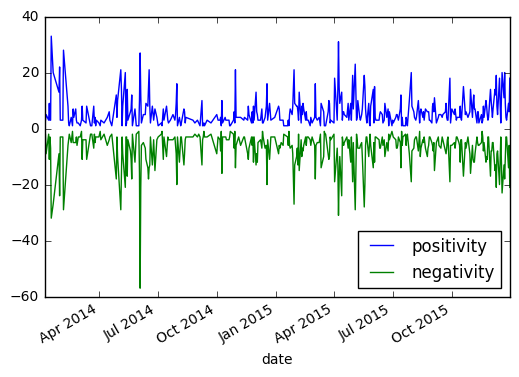

In [76]:
media_day[['positivity','negativity']].plot() # plot

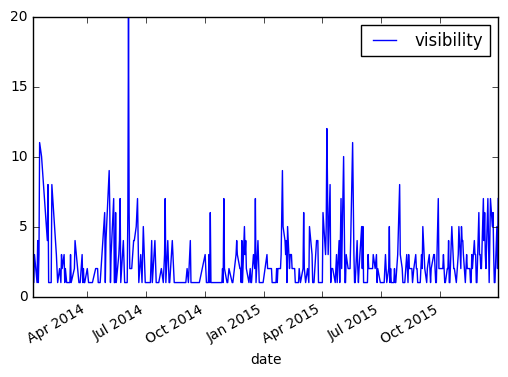

In [77]:
media_day[['visibility']].plot()

### Merge with stock dataset

Now that we have prepared everything, we can open our stock dataset, make sure that it is also indexed by day (luckily, its date is already saved in a format that can automatically be transformed to a datetime object, so we don't have to mess around with different variables here).

In [78]:
stock=pd.read_csv('stock.csv',sep=',')
stock['date']=pd.to_datetime(stock['Date'])
stock.index=pd.DatetimeIndex(stock['date'])
stock=stock.drop(['Date','date'],axis=1)

Again, it's always a goot idea to check whether the dataset looks like expected:

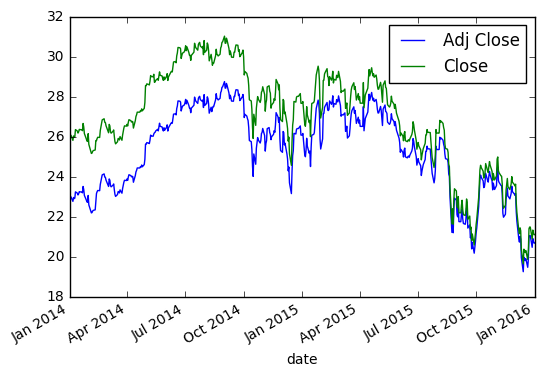

In [79]:
stock[['Adj Close','Close']].plot()

Now, we can merge the two dataset with the .join() method. The .fillna(0) method replaces missing values with 0, which makes sense in our case because if on a given day there is no information on media coverage (no negativity, no positivity, etc.), then the reason is not that we do not know these attributes, but simply that there was no article published, which should be reflected in the data as 0.

In [80]:
mediastock = stock.join(media_day,how='left').fillna(0)

In [81]:
mediastock[:5]

,Open,High,Low,Close,Volume,Adj Close,length,positivity,negativity,visibility
date,,,,,,,,,,
2016-01-01,21.095,21.095,21.095,21.095,0,20.6742,0.0,0.0,0.0,0.0
2015-12-31,21.135,21.140,20.915,21.095,1680700,20.6742,0.0,0.0,0.0,0.0
2015-12-30,21.330,21.375,21.110,21.185,5476800,20.7624,23717.0,18.0,-21.0,7.0
2015-12-29,21.000,21.410,20.995,21.325,6261600,20.8996,6795.0,6.0,-6.0,2.0
2015-12-28,21.440,21.450,20.705,20.880,5168400,20.4635,9348.0,9.0,-14.0,5.0


## Time to start the VAR analysis!

### Stationarity
The first thing you have to do is checking for stationarity as VAR requires all time series to be stationary. To test for this, Dickey-Fuller (DF) tests are conducted for all series under investigation. If the tests do not reject the null hypothesis that assumes time series to be non-stationary, the series need to be differenced to achieve stationarity of the series. After differencing, the DF tests usually yield significant results, meaning we have reached stationary of the series.
Let us first look into the variable we are most interested in, the stock prices. You could run
help(sm.tsa.stattools.adfuller)
to learn more about every detail, but for now, it might be enough to know that the first line gives you the Z-score, whole the second returned value is the p-value.

In [82]:
sm.tsa.stattools.adfuller(mediastock['Adj Close'])

(-2.5515110941521715,
 0.10343866512202399,
 1,
 521,
 {'1%': -3.4429638415440995,
  '10%': -2.5697331315829222,
  '5%': -2.8671034821276349},
 404.34278073538189)

We see that p=.10, which is not significant. Therefore, we need to *difference* the series. 

But lets first check the other variables, and let's write a nice loop that prints out only the p-values in a clear way.

In [83]:
mediavars=['positivity','negativity','visibility']
for m in mediavars:
    print(m,sm.tsa.stattools.adfuller(mediastock[m])[1])

positivity 2.84712704019e-30
negativity 3.83303299318e-30
visibility 5.00238766254e-30


These series are clearly stationary, so usually we would NOT need to difference. But because *all* series have to be stationary, and one series (the stock price) is not, we have to differentiate anyway.
To avoid any confusion (and because our dataset is so small that we don't care about the extra memory here), we create a new dataframe for this:

In [84]:
mediastockdiff=mediastock
mediastockdiff['Adj Close']=mediastockdiff['Adj Close'].diff()
mediastockdiff['visibility']=mediastockdiff['visibility'].diff()
mediastockdiff['positivity']=mediastockdiff['positivity'].diff()
mediastockdiff['negativity']=mediastockdiff['negativity'].diff()

# Of course, it would have been more efficient to write a loop again for this, 
# but there needs some room for you to improve this template ;-)

Because of differentiation, the first row of the differentiated values now is NaN ('not a number', missing). Make sure to take that into account in future analysis.

In [85]:
mediastockdiff[:5]

,Open,High,Low,Close,Volume,Adj Close,length,positivity,negativity,visibility
date,,,,,,,,,,
2016-01-01,21.095,21.095,21.095,21.095,0,NaN,0.0,NaN,NaN,NaN
2015-12-31,21.135,21.140,20.915,21.095,1680700,0.0000,0.0,0.0,0.0,0.0
2015-12-30,21.330,21.375,21.110,21.185,5476800,0.0882,23717.0,18.0,-21.0,7.0
2015-12-29,21.000,21.410,20.995,21.325,6261600,0.1372,6795.0,-12.0,15.0,-5.0
2015-12-28,21.440,21.450,20.705,20.880,5168400,-0.4361,9348.0,3.0,-8.0,3.0


In the particular domain of this dataset (predicting stock volatility), it seems to be common to not predict the direction of change, but only the absolute value of the change, irrespective of whether it is going up or down. So, that's what we're going to do -- but feel free to try out what happens if you use the original value instead!

In [86]:
mediastockdiff['Adj Close_abs']=mediastockdiff['Adj Close'].abs()

To be absolutely sure, let's check again for stationarity. 

In [87]:
# .ix[2:] slices the dataframe (in effect leaves away row number 0 and 1 which is NAN now b/c of differentiation)

allvars=['Adj Close','Adj Close_abs','positivity','negativity','visibility']
for m in allvars:
    print(m, sm.tsa.stattools.adfuller(mediastockdiff.ix[2:][m])[1])

Adj Close 0.0
Adj Close_abs 1.88233339063e-16
positivity 7.32004249564e-16
negativity 5.50684214047e-17
visibility 2.72988524093e-17


Great! Everything looks good now, all series are stationary.

### Lag selection

In the next step, the number of lags of the variables in the model needs to be specified. This decision should be mainly triggered by theory. Furthermore, you can look at the fit-statistics such as the AIC and BIC to choose the number of lags that suggests the best model fit. The asterisks in the output of the selection-order criteria usually indicate the optimal number of lags for the model.

In [88]:
dfsub = mediastockdiff.ix[1:][['visibility','Adj Close_abs']]

model = sm.tsa.VAR(dfsub)
model.select_order(15)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0       -0.7696      -0.7529       0.4632      -0.7631
1       -0.9951      -0.9450       0.3697      -0.9754
2        -1.079      -0.9960       0.3398       -1.047
3        -1.118      -1.001*       0.3269       -1.072
4        -1.151       -1.001       0.3163      -1.092*
5        -1.161      -0.9772       0.3133       -1.089
6        -1.169      -0.9519       0.3108       -1.084
7        -1.180      -0.9297       0.3073       -1.082
8        -1.185      -0.9015       0.3057       -1.074
9        -1.193      -0.8765       0.3032       -1.069
10       -1.185      -0.8343       0.3059       -1.047
11       -1.186      -0.8022       0.3055       -1.035
12       -1.188      -0.7705       0.3050       -1.024
13       -1.204      -0.7540       0.2999       -1.028
14      -1.205*      -0.7208      0.2999*       -1.015
15       -

{'aic': 14, 'bic': 3, 'fpe': 14, 'hqic': 4}

Based on the AIC, we conclude that 14 lags are most appropriate.

### Estimating a VAR model

We now can estimate a VAR model with 14 lags:
To do so, again, a subset of the data is created to use only the variables of interest for this model. Also, remember to leave away row number 0 ([1:]) as it contains NAN after differencing. 

In [89]:
dfsub = mediastockdiff.ix[1:][['visibility','Adj Close_abs']]
model = sm.tsa.VAR(dfsub)
results = model.fit(14)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Nov, 2016
Time:                     21:13:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.721899
Nobs:                     508.000    HQIC:                  -1.01550
Log likelihood:          -1077.60    FPE:                   0.299794
AIC:                     -1.20491    Det(Omega_mle):        0.268289
--------------------------------------------------------------------
Results for equation visibility
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.325729         0.238591            1.365           0.173
L1.visibility            -0.719514         0.045303          -15.882           0.000
L1.Adj Close_abs         -0.128678     

The next thing we want to do is to test the Granger Causaility to find out if visibility leads to market volatility or the other way around.

In [90]:
results.test_causality('Adj Close_abs',['visibility'])

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         1.745440         1.702102            0.042  (14, 958)
H_0: ['visibility'] do not Granger-cause Adj Close_abs
Conclusion: reject H_0 at 5.00% significance level


{'conclusion': 'reject',
 'crit_value': 1.7021015432469633,
 'df': (14, 958),
 'pvalue': 0.042373784148657924,
 'signif': 0.05,
 'statistic': 1.7454396889704096}

It seems that visibility Granger-causes price volatility, as we reject H0.

In [91]:
results.test_causality('visibility','Adj Close_abs')

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         0.680673         1.702102            0.795  (14, 958)
H_0: ['Adj Close_abs'] do not Granger-cause visibility
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 1.7021015432469633,
 'df': (14, 958),
 'pvalue': 0.79487167664391412,
 'signif': 0.05,
 'statistic': 0.68067331226199224}

We do not find an effect from volatility on visibility, because we cannot reject H0. This is pretty much what we expected, as we expected that stock exchange prices react to media coverage, rather than media coverage reacting to stock volatility.

However, all of this is rather hard to see on the plots:

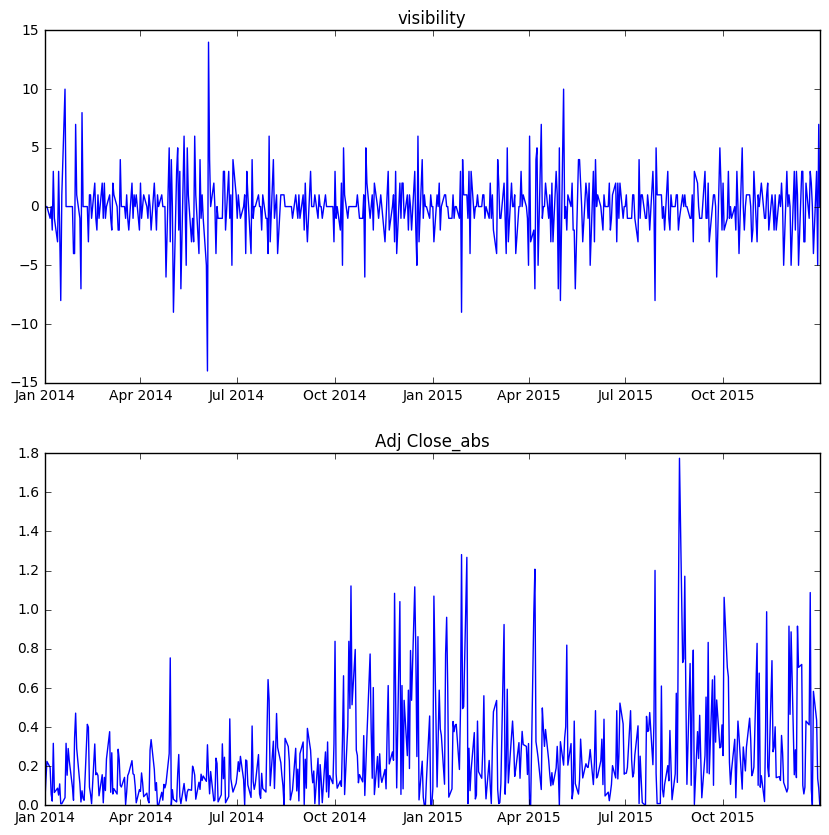

In [92]:
results.plot()

The next question to answer is how long the effects last. This can be done by plotting the impulse response functions for the appropriate number of lags. 
The *cumulative impulse response function* (CIRF) summarizes the additional increase of the dependent variable after there is a one-unit increase in the independent variable. For example, an additional one-unit increase of X results in a significant increase(decrease) of .075 points of variable Y.

/usr/local/lib/python3.5/dist-packages/numpy/lib/twodim_base.py:233: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m = zeros((N, M), dtype=dtype)
/usr/local/lib/python3.5/dist-packages/numpy/lib/twodim_base.py:240: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m[:M-k].flat[i::M+1] = 1


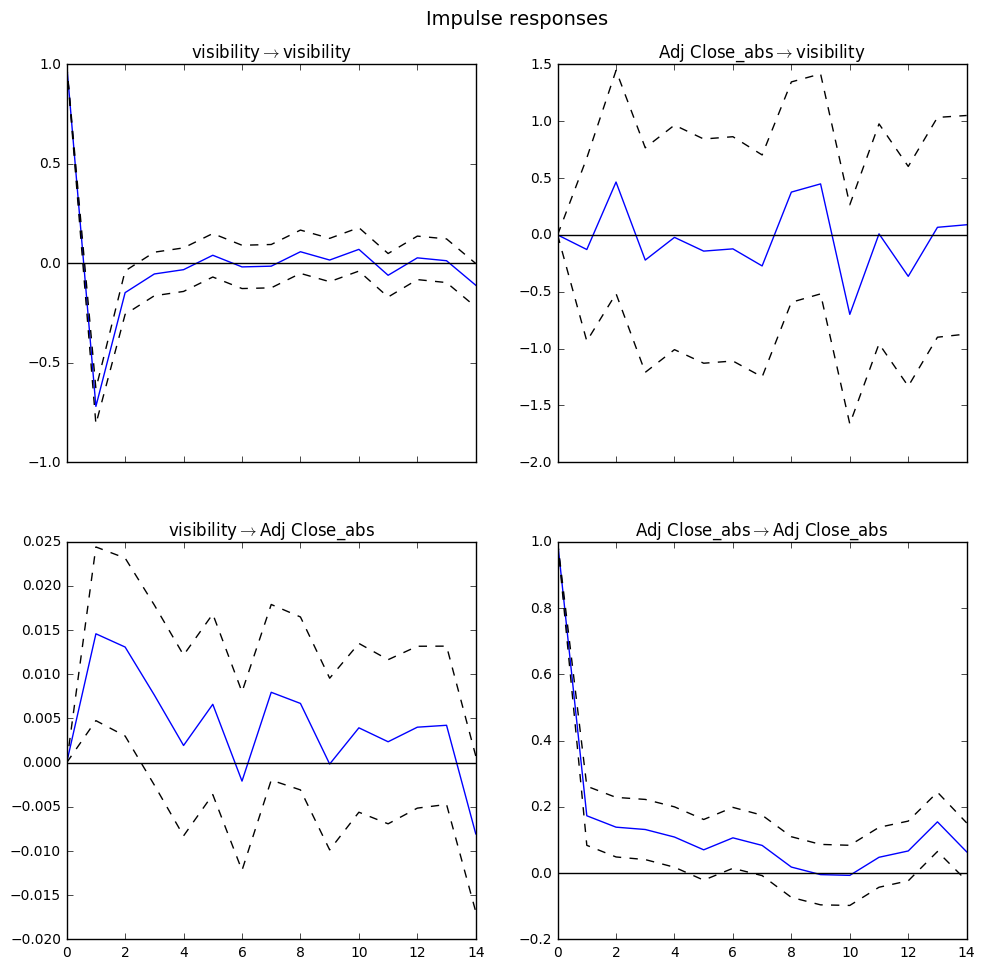

In [93]:
irf = results.irf(14)
irf.plot()

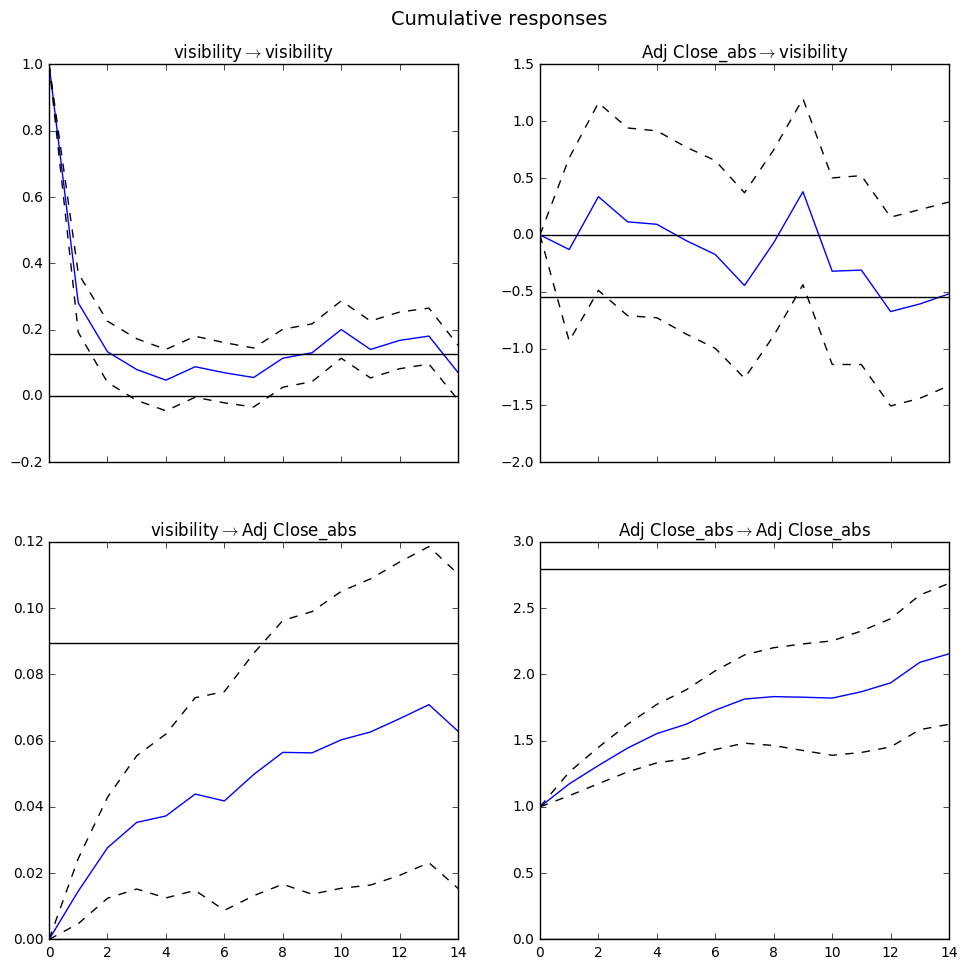

In [94]:
irf.plot_cum_effects()

As we have concluded that media attention Granger causes stock price volatility, the bottom left graphs are most interesting for us.
To identify the exact CIRF value have to investigate the values of CIRF.

In [95]:
irf.cum_effects

array([[[ 1.        ,  0.        ],
        [ 0.        ,  1.        ]],

       [[ 0.28048557, -0.12867787],
        [ 0.0145817 ,  1.17311504]],

       [[ 0.13305705,  0.33648917],
        [ 0.027665  ,  1.31187104]],

       [[ 0.07945376,  0.11498079],
        [ 0.03531454,  1.44357964]],

       [[ 0.04749218,  0.09323279],
        [ 0.03725976,  1.5525341 ]],

       [[ 0.08792551, -0.04948877],
        [ 0.04386472,  1.62293381]],

       [[ 0.06984184, -0.17238164],
        [ 0.04177942,  1.7294881 ]],

       [[ 0.05546165, -0.4454798 ],
        [ 0.04974236,  1.81321092]],

       [[ 0.11366068, -0.06882544],
        [ 0.05644465,  1.83159453]],

       [[ 0.1301192 ,  0.38004698],
        [ 0.05628911,  1.82716956]],

       [[ 0.2002238 , -0.31925599],
        [ 0.06023265,  1.8205212 ]],

       [[ 0.14005431, -0.30992317],
        [ 0.06260012,  1.86842338]],

       [[ 0.16748297, -0.67452881],
        [ 0.06661536,  1.93540898]],

       [[ 0.18042874, -0.60776999],
  

In [96]:
irf.cum_effect_stderr()

array([[[ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.04530319,  0.41128177],
        [ 0.00501322,  0.04551215]],

       [[ 0.04714148,  0.4209526 ],
        [ 0.00776845,  0.0699251 ]],

       [[ 0.04739927,  0.42141438],
        [ 0.01025895,  0.0917679 ]],

       [[ 0.04724167,  0.41960847],
        [ 0.01261818,  0.11254497]],

       [[ 0.04696843,  0.41955795],
        [ 0.01483129,  0.13236209]],

       [[ 0.04633971,  0.42155786],
        [ 0.01683626,  0.15130477]],

       [[ 0.04544735,  0.41640578],
        [ 0.0186532 ,  0.16981382]],

       [[ 0.04461496,  0.41716871],
        [ 0.02030445,  0.18820762]],

       [[ 0.04447911,  0.41765417],
        [ 0.0217509 ,  0.20517853]],

       [[ 0.04419034,  0.41874189],
        [ 0.022853  ,  0.22016744]],

       [[ 0.04382003,  0.42415739],
        [ 0.02356775,  0.23371871]],

       [[ 0.04365064,  0.4238062 ],
        [ 0.02411533,  0.24663573]],

       [[ 0.04302461,  0.42365762],
  

Similarly to the graph, we are interested in the influence of media attention on stock price volatility. We also want to know the *cummulative effect* - effect after a certain number of lags. Thereofre, we need to look at the last four items in the list, and more specifically the bottom left number. We can conclude that an additional one-unit increase of media attention (one additional article published) results in a significant increase of .063 points of stock volatility.

To conclude if the CIRF is stable we investigate the confidnece intervals. We can see them in the graph above and calculate them from the standard error of the CIRF.

Next, we compute the *forecast error variance* (FEV), which is a good indicator to show how much of the movement of
one variable is attributed by shocks of its own past and to what extent by shocks of the other variables. The method can show how much variation of one variable can be explained by its own past or by another variable. 
Similarly to the CIRF, the appropriate number of lags is selected for this analysis. 

In [97]:
fevd = results.fevd(14)
fevd.summary()

FEVD for visibility
      visibility  Adj Close_abs
0       1.000000       0.000000
1       0.999866       0.000134
2       0.998151       0.001849
3       0.997766       0.002234
4       0.997764       0.002236
5       0.997606       0.002394
6       0.997487       0.002513
7       0.996900       0.003100
8       0.995793       0.004207
9       0.994217       0.005783
10      0.990442       0.009558
11      0.990463       0.009537
12      0.989445       0.010555
13      0.989411       0.010589

FEVD for Adj Close_abs
      visibility  Adj Close_abs
0       0.000188       0.999812
1       0.016176       0.983824
2       0.028221       0.971779
3       0.031775       0.968225
4       0.031662       0.968338
5       0.034498       0.965502
6       0.034504       0.965496
7       0.038518       0.961482
8       0.041549       0.958451
9       0.041550       0.958450
10      0.042612       0.957388
11      0.042884       0.957116
12      0.043750       0.956250
13      0.043918       0.956

Looking at the "FEVD for Adj Close_abs" value at lag 14 we can conclude that 4.39% of variation in stock price volatility can be explaied by media attenion within two weeks.

To conclude that the constructed VAR model is robust several tests need to be conducted.

First, before interpreting the results of the VAR analysis, one has to test the residuals of the time series for non-autocorrelation. This needs to be done in order to be sure that the series adequately reflects the series¹ past. The null hypothesis of the Portmonteau (Q) test assumes the residuals to be white noise. Hence, we aim for accepting the null hypothesis (look for non-significant result). If this is not achieved, it can be considered to add additional lags to the model (however, keep in mind that the number of lags should be rather kept low in order to prevent spurious relations).

The comand below returns residuals values needed in robustness checks. You can use them in later tests.

In [98]:
results.resid

,visibility,Adj Close_abs
date,,
2015-12-11,-1.458997,0.274699
2015-12-10,0.255809,0.587528
2015-12-09,1.734854,-0.309604
2015-12-08,-0.286063,-0.077404
2015-12-07,2.595280,-0.199739
2015-12-04,-2.121594,0.489160
2015-12-03,-0.532777,-0.111452
2015-12-02,-0.283896,0.552725
2015-12-01,-1.127898,-0.257389


We now run the Portmonteau (Q) test for both variables in the model. The usual number of 20 lags is selected for this test.

In [99]:
r=sm.stats.diagnostic.acorr_ljungbox(results.resid['Adj Close_abs'],lags=20)
i=0
for e in zip(r[0],r[1]):
    i+=1
    print('lag {}\t Ljung Box test: {}\tp = {}'.format(i,e[0],e[1]))

lag 1	 Ljung Box test: 0.009909034698841706	p = 0.9207062476836734
lag 2	 Ljung Box test: 0.12721383702126202	p = 0.9383737844094868
lag 3	 Ljung Box test: 0.15256866803995	p = 0.984856517405008
lag 4	 Ljung Box test: 0.15256964710653118	p = 0.9972341411176813
lag 5	 Ljung Box test: 0.16305375218840387	p = 0.9994611708931804
lag 6	 Ljung Box test: 0.25452455297252913	p = 0.9996876592497317
lag 7	 Ljung Box test: 0.5301900329504086	p = 0.999328257171756
lag 8	 Ljung Box test: 1.429404456448766	p = 0.9938190228496728
lag 9	 Ljung Box test: 1.5536609204377139	p = 0.9967287573967166
lag 10	 Ljung Box test: 1.7705995279596038	p = 0.9978151688997599
lag 11	 Ljung Box test: 1.8013457398128203	p = 0.9990813874881178
lag 12	 Ljung Box test: 1.8667759905031194	p = 0.9995844447950801
lag 13	 Ljung Box test: 1.8667811582301488	p = 0.9998470103942607
lag 14	 Ljung Box test: 2.151943428656646	p = 0.9998698258730293
lag 15	 Ljung Box test: 3.3755981930112737	p = 0.9991714911676655
lag 16	 Ljung Box t

In the example above, we took some effort to print the results nicely. That's nice, but not neccessary. Let's do the same test vor the visibility variable without pretty-printing: (the first list of numbers contain the test statistics, the second the p values)

In [100]:
sm.stats.diagnostic.acorr_ljungbox(results.resid['visibility'],lags=20)

(array([  8.06018509e-04,   1.74741063e-01,   1.75157762e-01,
          2.49424859e-01,   3.75438828e-01,   3.77061001e-01,
          8.11909051e-01,   9.00679512e-01,   1.35328095e+00,
          1.54815906e+00,   2.04475197e+00,   2.23157454e+00,
          2.72095709e+00,   4.07805398e+00,   5.47591694e+00,
          6.42605681e+00,   1.32464594e+01,   1.34991814e+01,
          1.45796095e+01,   1.53209909e+01]),
 array([ 0.97735073,  0.9163375 ,  0.98149639,  0.99284071,  0.99597918,
         0.99902976,  0.99732051,  0.99880135,  0.99809591,  0.99877737,
         0.99833236,  0.99895961,  0.99876785,  0.99497809,  0.98727247,
         0.9828053 ,  0.7195371 ,  0.76110681,  0.748916  ,  0.75775525]))

Test for autocorrelation indicates that residuals morror white noise (at 20th lang, absolute closing price: 6.87, ns; media attenton: 15.32, ns)

Next, the Portmonteau (Q) test is exercised again, nut now by looking at the squared residuals of the series. The null hypothesis is the same as above. If we have to reject the null-hypothesis, this means we have to deal with heteroscedastic data. In other words, the variability of the residuals of all the stock market data is not equally distributed over time, but dependent on the time of measurement. To overcome this problem, one can either look for more sophisticated time series models (ARCH), or taking logarithmic values of the series. If taking logarithmic values is still not solving the problem, one should report this in the results section and report the results with caution.

To perform the next test we first need to create a list with squared residuals for the variables.

In [101]:
# HETEROSCEDASTICITY
sres_adj_close=[]
for line in results.resid['Adj Close_abs']:
    r_s=line*line
    #print(r_s)
    sres_adj_close.append(r_s)

In [102]:
sm.stats.diagnostic.acorr_ljungbox(sres_adj_close,lags=20)

(array([  1.43442224,   8.22674035,  35.26969798,  35.27257456,
         36.09028323,  36.64674341,  37.21772496,  37.22792873,
         37.97518371,  38.44129463,  39.28996976,  39.64562894,
         43.28488208,  44.77393331,  46.20838018,  46.85687674,
         63.44175708,  63.75254817,  63.94313348,  70.34074264]),
 array([  2.31044080e-01,   1.63525705e-02,   1.06844298e-07,
          4.08335510e-07,   9.11121339e-07,   2.06327990e-06,
          4.26555947e-06,   1.04493828e-05,   1.76109568e-05,
          3.17915425e-05,   4.72868083e-05,   8.23237114e-05,
          4.02918279e-05,   4.43865474e-05,   4.92614665e-05,
          7.16878356e-05,   2.81083292e-07,   4.99513371e-07,
          9.05776337e-07,   1.60222512e-07]))

In [103]:
sres_aantal=[]
for line in results.resid['visibility']:
    r_s=line*line
    sres_aantal.append(r_s)

In [104]:
sm.stats.diagnostic.acorr_ljungbox(sres_aantal,lags=20)

(array([  3.43198235,   4.89807865,   5.61552127,   5.69303952,
          6.7631123 ,   6.77653363,   7.02345153,   7.57127944,
          8.87771534,  13.22007824,  13.22007825,  16.87046793,
         17.32307556,  17.56335   ,  19.7387624 ,  19.76959372,
         24.58911899,  25.43803526,  25.52146006,  25.68735034]),
 array([ 0.0639453 ,  0.08637653,  0.13189013,  0.22327502,  0.23886243,
         0.34200866,  0.42644219,  0.47642721,  0.44863797,  0.21162601,
         0.27918496,  0.15453519,  0.18495269,  0.22739715,  0.18218476,
         0.23077781,  0.10429151,  0.11331838,  0.14408406,  0.17638778]))

We cannot reject the null hypothesis for the absolute closing price, which means that for this variable we can observe heteroscedasticity. However, as it is a common phenomenon for stock maret data thus no additional transformations are necessary.  

The final test - the VAR stability test - checks the eigenvalue stability condition after estimating the VAR model. The modulus of each eigenvalue has to be less than 1 so that the VAR model can be considered stable. If the VAR model is considered stable, we can interpret the CIRF and FEVD as outlined above.

In [105]:
smtsa.vector_ar.var_model.VARProcess.is_stable(results)

True

The returned value 'True' allows us to coclude that the model is stable. 

# TONE

Now it's your turn! There are some other variables in the dataset to play with, for example positivity and negativity. You might also think of combining them into some general measure of tone or of absolute emotionality. Good luck!